<b><h2> CROP YIELD PREDICTION IN INDIA </h2></b>

Predicting yield helps the state to get an estimate of the crop in a
certain year to control the price rates.This model focuses on predicting the crop yield in advance by analyzing
factors like location, season, and crop type  through machine learning techniques on
previously collected datasets.

# **PRE-PROCESSING**


In [ ]:
# importing necessary libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading the dataset

url = 'https://raw.githubusercontent.com/jdapoorv/Crop-yield-prediction/main/crop_csv_file_1_.csv'
crop_data = pd.read_csv(url)
crop_data


,State_Name,District_Name,Crop_Year,Season,Crop,Temperature,Humidity,Soil_Moisture,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,36,35,45,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,37,40,46,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,36,41,50,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,37,42,55,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,36,40,54,720.0,165.0
...,...,...,...,...,...,...,...,...,...,...
49994,Chhattisgarh,JANJGIR-CHAMPA,2006,Kharif,Small millets,36,35,45,27.0,7.0
49995,Chhattisgarh,JANJGIR-CHAMPA,2006,Kharif,Soyabean,37,40,46,27.0,32.0
49996,Chhattisgarh,JANJGIR-CHAMPA,2006,Kharif,Sunflower,36,41,50,450.0,213.0
49997,Chhattisgarh,JANJGIR-CHAMPA,2006,Kharif,Urad,37,42,55,1778.0,309.0


In [ ]:
crop_data.shape

#rows X columns

(49999, 10)

In [ ]:
# dataset columns
crop_data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop',
       'Temperature', 'Humidity', 'Soil_Moisture', 'Area', 'Production'],
      dtype='object')

In [ ]:
# Statistical summary of data frame.

crop_data.describe()

,Crop_Year,Temperature,Humidity,Soil_Moisture,Area,Production
count,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,4.978400e+04
mean,2005.879138,34.445489,44.776116,53.110502,7363.389469,4.132019e+05
std,5.106092,3.498524,6.662406,5.258764,27927.935789,1.232609e+07
min,1997.000000,25.000000,35.000000,45.000000,0.200000,0.000000e+00
25%,2002.000000,34.000000,40.000000,50.000000,76.000000,8.700000e+01
50%,2006.000000,36.000000,42.000000,54.000000,436.000000,6.384400e+02
75%,2010.000000,36.000000,50.000000,55.000000,2546.500000,5.615000e+03
max,2014.000000,37.000000,55.000000,62.000000,877029.000000,7.801620e+08


In [ ]:
# Checking missing values of the dataset in each column
crop_data.isnull().sum()

State_Name         0
District_Name      0
Crop_Year          0
Season             0
Crop               0
Temperature        0
Humidity           0
Soil_Moisture      0
Area               0
Production       215
dtype: int64

In [ ]:
# Replacing missing values with mean of the production coloumn
crop_data['Production'] = crop_data['Production'].fillna(crop_data['Production'].mean())
crop_data

,State_Name,District_Name,Crop_Year,Season,Crop,Temperature,Humidity,Soil_Moisture,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,36,35,45,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,37,40,46,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,36,41,50,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,37,42,55,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,36,40,54,720.0,165.0
...,...,...,...,...,...,...,...,...,...,...
49994,Chhattisgarh,JANJGIR-CHAMPA,2006,Kharif,Small millets,36,35,45,27.0,7.0
49995,Chhattisgarh,JANJGIR-CHAMPA,2006,Kharif,Soyabean,37,40,46,27.0,32.0
49996,Chhattisgarh,JANJGIR-CHAMPA,2006,Kharif,Sunflower,36,41,50,450.0,213.0
49997,Chhattisgarh,JANJGIR-CHAMPA,2006,Kharif,Urad,37,42,55,1778.0,309.0


In [ ]:
#checking
crop_data.isnull().values.any()

False

In [ ]:
# Displaying State Names present in the dataset
print(crop_data.State_Name.unique())
print('Total count of states and Union Territories:', len(crop_data.State_Name.unique()))


['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh']
Total count of states and Union Territories: 7


In [ ]:
# Adding a new column Yield which indicates Production per unit Area. 

crop_data['Yield'] = (crop_data['Production'] / crop_data['Area'])
crop_data.head(10) 

,State_Name,District_Name,Crop_Year,Season,Crop,Temperature,Humidity,Soil_Moisture,Area,Production,Yield
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,36,35,45,1254.0,2000.0,1.594896
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,37,40,46,2.0,1.0,0.500000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,36,41,50,102.0,321.0,3.147059
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,37,42,55,176.0,641.0,3.642045
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,36,40,54,720.0,165.0,0.229167
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,34,45,52,18168.0,65100000.0,3583.223250
6,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,34,55,62,36.0,100.0,2.777778
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,35,50,59,1.0,2.0,2.000000
8,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sweet potato,25,55,55,5.0,15.0,3.000000
9,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Tapioca,36,35,45,40.0,169.0,4.225000


In [ ]:
# Dropping unnecessary columns

data = crop_data.drop(['State_Name'], axis = 1)

In [ ]:
data.corr()

,Crop_Year,Temperature,Humidity,Soil_Moisture,Area,Production,Yield
Crop_Year,1.000000,0.000505,-0.001339,-0.001533,0.000842,0.007962,0.015756
Temperature,0.000505,1.000000,-0.696194,-0.286471,-0.000204,0.005063,0.000367
Humidity,-0.001339,-0.696194,1.000000,0.812524,-0.000787,-0.002596,-0.000893
Soil_Moisture,-0.001533,-0.286471,0.812524,1.000000,0.000700,-0.000754,0.001810
Area,0.000842,-0.000204,-0.000787,0.000700,1.000000,0.027836,-0.012039
Production,0.007962,0.005063,-0.002596,-0.000754,0.027836,1.000000,0.027050
Yield,0.015756,0.000367,-0.000893,0.001810,-0.012039,0.027050,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

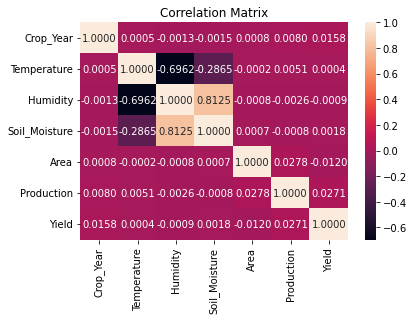

In [ ]:
sns.heatmap(data.corr(), annot =True, fmt='.4f')
plt.title('Correlation Matrix')

In [ ]:
dummy = pd.get_dummies(data)
dummy


,Crop_Year,Temperature,Humidity,Soil_Moisture,Area,Production,Yield,District_Name_ANANTAPUR,District_Name_ANJAW,District_Name_ARARIA,...,Crop_Tapioca,Crop_Tobacco,Crop_Tomato,Crop_Turmeric,Crop_Urad,Crop_Varagu,Crop_Wheat,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
0,2000,36,35,45,1254.0,2000.0,1.594896,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2000,37,40,46,2.0,1.0,0.500000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2000,36,41,50,102.0,321.0,3.147059,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2000,37,42,55,176.0,641.0,3.642045,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2000,36,40,54,720.0,165.0,0.229167,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,2006,36,35,45,27.0,7.0,0.259259,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49995,2006,37,40,46,27.0,32.0,1.185185,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49996,2006,36,41,50,450.0,213.0,0.473333,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,2006,37,42,55,1778.0,309.0,0.173791,0,0,0,...,0,0,0,0,1,0,0,0,0,0


<b><i> Splitting dataset into train and test dataset </i></b>

In [ ]:

from sklearn.model_selection import train_test_split

x = dummy.drop(["Production","Yield"], axis=1)
y = dummy["Production"]

# Splitting data set - 25% test dataset and 75% 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=42)

print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (37499, 203)
x_test : (12500, 203)
y_train : (37499,)
y_test : (12500,)


In [ ]:
print(x_train)
print(y_train)

       Crop_Year  Temperature  Humidity  Soil_Moisture     Area  \
27434       2009           36        40             54   2761.0   
13400       1999           36        35             45  57620.0   
883         2013           37        40             46    935.0   
7303        2004           36        40             54   9065.0   
49251       2005           36        35             45   7505.0   
...          ...          ...       ...            ...      ...   
11284       2002           35        50             59    130.0   
44732       2013           25        55             55     29.0   
38158       2010           37        42             55   2347.0   
860         2013           34        45             52      2.0   
15795       2009           37        40             46    767.0   

       District_Name_ANANTAPUR  District_Name_ANJAW  District_Name_ARARIA  \
27434                        0                    0                     1   
13400                        0           

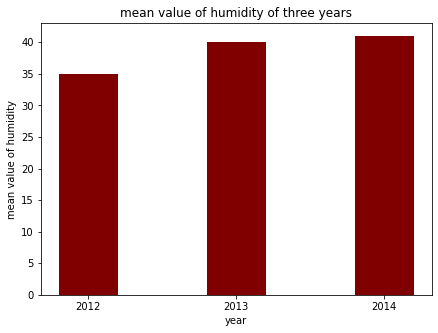

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# creating the dataset
year = [2012,2013,2014]
values = []
data1 = pd.DataFrame(crop_data)
for x in range(3):
  curyearsum=0
  count=0
  for y in range(1000):
    if(data1.iloc[y]["Crop_Year"] == year[x]):
      count+=1;
      curyearsum += data1.iloc[x]["Humidity"]
  values.append(curyearsum/count)
fig = plt.figure(figsize = (7, 5))
 
# creating the bar plot
x = np.array(["2012","2013","2014"])
y = np.array(values)
plt.xlabel("year")
plt.ylabel("mean value of humidity")
plt.title("mean value of humidity of three years")
plt.bar(x,y,color ='maroon', width = 0.4)
plt.show()

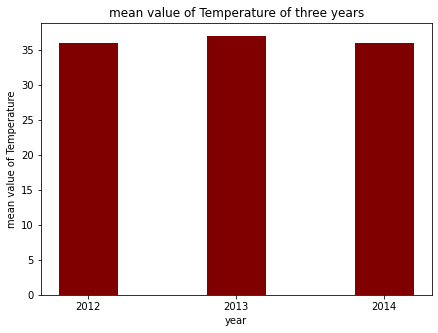

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# creating the dataset
year = [2012,2013,2014]
values = []
data1 = pd.DataFrame(crop_data)
for x in range(3):
  curyearsum=0
  count=0
  for y in range(1000):
    if(data1.iloc[y]["Crop_Year"] == year[x]):
      count+=1;
      curyearsum += data1.iloc[x]["Temperature"]
  values.append(curyearsum/count)
fig = plt.figure(figsize = (7, 5))
 
# creating the bar plot
x = np.array(["2012","2013","2014"])
y = np.array(values)
plt.xlabel("year")
plt.ylabel("mean value of Temperature")
plt.title("mean value of Temperature of three years")
plt.bar(x,y,color ='maroon', width = 0.4)
plt.show()

# **Linear Regression**

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes[0].scatter(crop_data['Temperature'], crop_data['Production'], color='red')
axes[1].scatter(crop_data['Soil_Moisture'], crop_data['Production'], color='blue')
axes[0].set_title("Temperature vs Production")
axes[1].set_title("Soil_Moisture vs Production")
axes[0].set_ylabel("Production")
axes[0].set_xlabel("Temperture")
axes[1].set_ylabel("Production")
axes[1].set_xlabel("Soil_Moisture")
plt.show()

In [ ]:
# Training the Simple Linear Regression model .

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

In [ ]:
lr_predict = model.predict(x_test)
lr_predict

In [ ]:
from sklearn.metrics import mean_squared_error
lr_predict = model.predict(x_test)
scores_regr = mean_squared_error(y_test, lr_predict)
print(scores_regr)
# print(mean_squared_error(y_train, lr_predict))

In [ ]:
# Predicting the test Results 

lr_predict = model.predict(x_test)
lr_predict

In [ ]:
model.score(x_test,y_test)

In [ ]:
from sklearn.metrics import r2_score
r = r2_score(y_test,lr_predict)
print("R2 score : ",r)

In [ ]:
plt.scatter(y_test,lr_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')

Clearly, the dataset is not good for linear regression.

<b> Assumptions of Linear Regression </b>
<ol>
    <li> Linearity.</li>
    <li> Homoscedasticity </li>
    <li> Multivariate normality </li>
    <li> Lack of multicollinearity </li>
    


R2 score: This is pronounced as R-squared, and this score refers to the coefficient of determination. 
This tells us how well the unknown samples will be predicted by our model.

# <b> Decision Tree </b>

In [ ]:
# Training model 
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 5)
regressor.fit(x_train,y_train)

# Predicting results
decisiontree_predict = regressor.predict(x_test)
decisiontree_predict

NameError: ignored

In [ ]:
regressor.score(x_test,y_test)

In [ ]:
plt.scatter(y_test,decisiontree_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree ')

In [ ]:
# Calculating R2 score :

from sklearn.metrics import r2_score
r2 = r2_score(y_test,decisiontree_predict)
print("R2 score : ",r2)

In [ ]:
# Calculating Adj. R2 score: 

Adjr2_2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_2))

In [ ]:
ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
sns.distplot(decisiontree_predict, hist = False, color = "b", label = "Predicted Values", ax = ax)
plt.title('Decision Tree Regression')

# **Random Forest Algorithm**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 11)
model.fit(x_train,y_train)
rf_predict = model.predict(x_test)
rf_predict

In [ ]:
model.score(x_test,y_test)

In [ ]:
# Calculating R2 score

from sklearn.metrics import r2_score
r1 = r2_score(y_test,rf_predict)
print("R2 score : ",r1)

In [ ]:
# Calculating Adj. R2 score: 

Adjr2_1 = 1 - (1-r1)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_1))

In [ ]:
ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
sns.distplot(rf_predict, hist = False, color = "b", label = "Predicted Values", ax = ax)
plt.title('Random Forest Regression')

In [ ]:
plt.scatter(y_test,rf_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest')

<b> Comparison between Linear Regression Algorithm and Random Forest Algorithm </b> 



1. Linear regression algorithm is not at all accurate for this kind of prediction.
2. Random Forest Algorithm has higher accuracy ( between 85 % to 90% ), but it is slow.

# <b> Support Vector Regression </b> 

In [ ]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.fit_transform(x_test)

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
regr = make_pipeline(StandardScaler(), SVR(kernel='rbg'))
regr.fit(x_train,y_train)

In [ ]:
svr_predict = regr.predict(x_test)
svr_predict

In [ ]:
print(regr.score(x_test,y_test))

In [ ]:
from sklearn.metrics import r2_score
r3 = r2_score(y_test,svr_predict)
print(r3)

In [ ]:
# Calculating Adj. R2 score: 

Adjr2_3 = 1 - (1-r3)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_3))

In [ ]:
ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
sns.distplot(svr_predict, hist = False, color = "b", label = "Predicted Values", ax = ax)
plt.title('Support Vector Regression')

# <b> Cross-validation </b> 

Random Forest

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model, X = x_train, y=y_train, cv = 10)
accuracies

In [ ]:
a1 = (accuracies.mean()*100)
b1 = (accuracies.std()*100)

In [ ]:

# Mean Accuracy and SD of 10 fold results

print("Accuracy : {:.2f}%".format (accuracies.mean()*100))
print("Standard Deviation : {:.2f}%".format(accuracies.std()*100))

Decision Tree


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = x_train, y=y_train, cv = 10)

In [ ]:
a2 = (accuracies.mean()*100)
b2 = (accuracies.std()*100)

In [ ]:
print("Accuracy : {:.2f}%".format (accuracies.mean()*100))
print("Standard Deviation : {:.2f}%".format(accuracies.std()*100))

Support Vector Regressor

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = x_train, y=y_train, cv = 10)

In [ ]:
a3 = (accuracies.mean()*100)
b3 = (accuracies.std()*100)

In [ ]:
print("Accuracy : {:.2f}%".format (accuracies.mean()*100))
print("Standard Deviation : {:.2f}%".format(accuracies.std()*100))

Comparing with Graphs


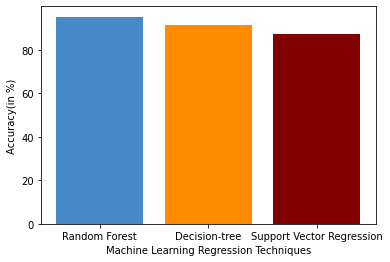

In [ ]:
# Mean Accuracy
import numpy as np
import matplotlib.pyplot as plt
 
# create a dataset
Algorithms = ['Random Forest', 'Decision-tree', 'Support Vector Regression']
Accuracy = [a1, a2, a3]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['#488AC7','#ff8c00', '#800000'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('Accuracy(in %)')
plt.xlabel('Machine Learning Regression Techniques')

# Show graph
plt.show()

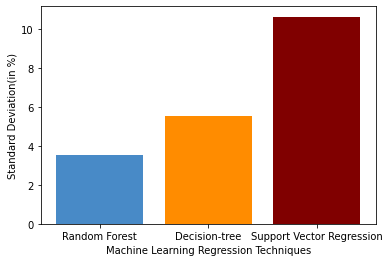

<Figure size 432x288 with 0 Axes>

In [ ]:
# Standard Deviation
import numpy as np
import matplotlib.pyplot as plt
 
# create a dataset
Algorithms = ['Random Forest', 'Decision-tree', 'Support Vector Regression']
Accuracy = [b1, b2, b3]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['#488AC7','#ff8c00', '#800000'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('Standard Deviation(in %)')
plt.xlabel('Machine Learning Regression Techniques')

# Show graph
plt.show()
plt.savefig('SD.png')

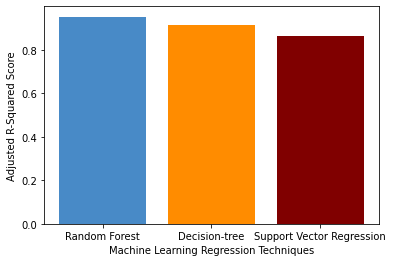

<Figure size 432x288 with 0 Axes>

In [ ]:
# Adjusted R2 value
import numpy as np
import matplotlib.pyplot as plt
 
# create a dataset
Algorithms = ['Random Forest', 'Decision-tree', 'Support Vector Regression']
Accuracy = [Adjr2_1, Adjr2_2, Adjr2_3]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['#488AC7','#ff8c00', '#800000'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('Adjusted R-Squared Score')
plt.xlabel('Machine Learning Regression Techniques')

# Show graph
plt.show()
plt.savefig('SD.png')

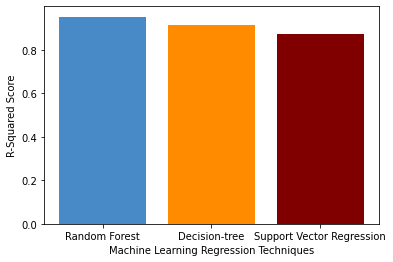

<Figure size 432x288 with 0 Axes>

In [ ]:
# R2 Score
import numpy as np
import matplotlib.pyplot as plt
 
# create a dataset
Algorithms = ['Random Forest', 'Decision-tree', 'Support Vector Regression']
Accuracy = [r1, r2, r3]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['#488AC7','#ff8c00', '#800000'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('R-Squared Score')
plt.xlabel('Machine Learning Regression Techniques')

# Show graph
plt.show()
plt.savefig('SD.png')